In [2]:
import pandas as pd
import numpy as np
from functions.Strategy import *
from functions.UtilsCreateDataFrame import *
from functions.UtilsGoogleDrive import *
import time
import json
import joblib
import warnings


warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

with open("config/config.json") as json_file:
        config = json.load(json_file)
        
drive = config["drive"]
idx = config["idx"]

pairs = joblib.load("config/giovanni_pairs.joblib")
print(pairs)

asset_name_1 = "BUSD"
asset_name_2 = "BNB"

[('BNB', 'DOGE'), ('XRP', 'BTC'), ('XRP', 'ADA'), ('XRP', 'SOL'), ('XRP', 'DOGE'), ('BTC', 'ADA'), ('BTC', 'SOL'), ('BTC', 'DOGE'), ('ADA', 'SOL'), ('ADA', 'DOGE'), ('SOL', 'DOGE')]


In [2]:
path = "H:\AllTickers_trades_2020-12_2021-12.csv.gz"
coin_df = loadCleanDataFrame(path)
coin_df

,ETH,BNB,XRP,BTC,ADA,SOL,DOGE,TRX,BUSD,MATIC,LTC,DOT,USDC
time,,,,,,,,,,,,,
2020-12-01 00:00:00+00:00,615.905,31.48780,0.666455,19716.285,0.172605,NaN,0.003562,0.032375,0.99965,NaN,87.820,5.37585,0.99955
2020-12-01 00:01:00+00:00,615.020,31.48485,0.664385,19671.260,0.172525,1.96650,0.003561,0.032375,0.99965,0.01958,87.625,5.36550,0.99955
2020-12-01 00:02:00+00:00,617.160,31.67270,0.667370,19695.980,0.173955,1.96545,0.003566,0.032465,0.99965,0.01963,87.840,5.37275,0.99955
2020-12-01 00:03:00+00:00,616.520,31.68055,0.668305,19646.785,0.174240,1.97090,0.003568,0.032505,0.99965,0.01963,87.630,5.37470,0.99955
2020-12-01 00:04:00+00:00,615.100,31.60980,0.665710,19607.025,0.173265,1.96120,0.003568,0.032490,0.99965,0.01956,87.455,5.36385,0.99955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:55:00+00:00,3676.720,511.45000,0.831050,46252.685,1.308500,170.22000,0.170250,0.075400,0.99995,2.52200,146.250,26.68500,0.99995
2021-12-31 23:56:00+00:00,3676.885,511.65000,0.830450,46249.995,1.309000,170.17500,0.170350,0.075420,0.99995,2.52400,146.350,26.69500,0.99995
2021-12-31 23:57:00+00:00,3677.495,511.65000,0.830000,46248.355,1.309500,170.15000,0.170350,0.075470,0.99995,2.52550,146.350,26.69000,0.99995


In [3]:
%%time
if drive:
    id_ = "1Vg9w6RpPjukasvRqxM4cqPxabDi9MeyS"
    folder_name, id_pair = CreatePairFolder(id_, (asset_name_1, asset_name_2))


beta_table, path_beta = create_beta_table(
    coin_df=coin_df.iloc[:2000],
    asset_name_1=asset_name_1,
    asset_name_2=asset_name_2,
    calibration_window=config["calibration_window"],
    frequency=config["frequency"],
    safe_output_csv=True,
    n_job=4,
    output_folder="H:",
    stat_test=config["stat_test"],
)

if drive:
    UploadFile(file=path_beta, folder_id=id_pair)

Wall time: 11.9 s


In [4]:
%%time


result = getCombRet(
    coin_df=coin_df.iloc[:2000],
    asset_name_1=asset_name_1,
    asset_name_2=asset_name_2,
    trading_windows=config["tresh"],
    calib_window=config["calibration_window"],
    p_values=config["p_values"],
    stop_loss=config["stop_loss"],
    stat_test=config["stat_test"],
    safe_beta_csv=True,
    input_folder="H:",
    output_folder_beta="H:",
    drive=drive,
)


SaveUploadResultStrategy(
    result, asset_name_1, asset_name_2, drive=drive, output_folder="H:", idx=idx
)

Beta Table Loaded
Wall time: 7.39 s


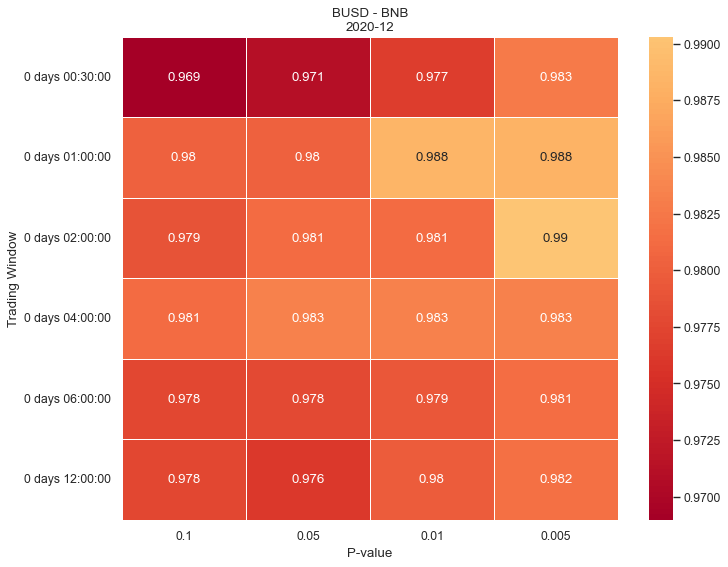

In [5]:
CreatePlot(
    result,
    asset_name_1=asset_name_1,
    asset_name_2=asset_name_2,
    to_save=True,
    visualize = True,
    output_folder="H:",
    drive=True,
    idx=idx,
    dpi=80,
)

In [6]:
"""
Example of trade book of the strategy for a given threshold and pvalue
"""

tr_w1 = config["tresh"][0]

result["2020-12"][1][f"{tr_w1}_0.005"]

,ret_,ret_no_fee,ret_type,spread_enter,spread_exit,fee_enter,fee_exit,borrow_fee,enter_,exit_,beta,intercept,r2,res_std,res_mean,stationarity_pvalue,date_est,Month
0,0.994177,0.999932,Long,0.992696,0.992628,0.001005,0.001005,0.003702,2020-12-01 13:17:00+00:00,2020-12-01 13:32:00+00:00,0.000215,0.992996,0.310027,0.000129,5.119362e-17,0.001890,2020-12-01 13:01:00+00:00,2020-12
1,0.994285,1.000096,Long,0.990763,0.990858,0.001007,0.001007,0.003742,2020-12-01 13:35:00+00:00,2020-12-01 14:04:00+00:00,0.000277,0.991032,0.546388,0.000133,-1.057796e-16,0.003624,2020-12-01 13:33:00+00:00,2020-12
2,0.994001,0.999919,Long,0.989323,0.989242,0.001009,0.001009,0.003836,2020-12-01 14:51:00+00:00,2020-12-01 15:17:00+00:00,0.000320,0.989635,0.748741,0.000117,-2.218904e-16,0.002431,2020-12-01 14:46:00+00:00,2020-12
